# read timeseries

In [8]:
import pandas as pd

In [9]:
# in data/ts/ we don't have cerebellum regions included. only 1012 regions.
def ts(subject, epoch): return pd.read_csv('data/ts/ts_'+str(subject)+'_'+epoch+'.csv')

In [10]:
ts(1, 'baseline').head()

,7Networks_LH_Vis_1,7Networks_LH_Vis_2,7Networks_LH_Vis_3,7Networks_LH_Vis_4,7Networks_LH_Vis_5,7Networks_LH_Vis_6,7Networks_LH_Vis_7,7Networks_LH_Vis_8,7Networks_LH_Vis_9,7Networks_LH_Vis_10,...,Left Hippocampus,Left Amygdala,Left Accumbens,Right Thalamus,Right Caudate,Right Putamen,Right Pallidum,Right Hippocampus,Right Amygdala,Right Accumbens
0,-0.707022,-0.763647,0.091984,-0.364270,-0.671012,0.649847,-0.246103,0.754983,0.631594,0.808759,...,-0.039909,-0.296537,0.289511,-0.253907,-0.810298,-2.000160,-0.479996,-0.109435,-0.101183,-0.529745
1,-1.313980,-1.436940,-1.149532,-0.640217,-0.504047,-0.101759,-1.111763,1.337396,-0.583194,0.339601,...,-2.327223,-1.698804,0.560162,-0.652799,-0.885699,-1.546196,-1.642955,-1.903944,-1.821804,-1.266036
2,-1.175622,-1.051546,-1.235031,-0.431280,0.932604,-0.134707,-1.171876,1.790176,-1.433821,0.045582,...,1.131981,0.295590,0.074461,1.340012,0.860470,-0.500277,1.571292,0.372534,-0.311690,1.368992
3,-0.353504,-0.274848,-0.234933,-0.489042,2.243884,0.170842,-0.643113,1.357257,-1.249307,-0.108199,...,1.107219,0.715183,0.545290,0.286716,1.322081,0.247186,-0.475064,1.685276,0.336718,0.141097
4,0.700392,-0.007258,0.933005,-0.998473,1.932399,0.061735,-0.015147,-0.129264,-0.079308,-0.225130,...,-0.512820,0.872590,-0.337517,0.173958,-0.530911,-1.526489,-0.450150,0.004471,0.469072,-1.424279


In [11]:
import numpy as np

In [12]:
from nilearn.connectome import ConnectivityMeasure

In [13]:
def cmat(ts: pd.DataFrame, fill_diag=False, kind='covariance') -> np.ndarray:
    conn_measure = ConnectivityMeasure(kind=kind)
    cmat = conn_measure.fit_transform([ts.to_numpy()])[0]
    if fill_diag:   np.fill_diagonal(cmat, 0)
    return cmat

In [14]:
cmat(ts(1, 'baseline'))

array([[ 1.00790368,  0.23419984,  0.50892185, ...,  0.1682564 ,
         0.19567103,  0.07654431],
       [ 0.23419984,  1.00794046,  0.23882741, ...,  0.01707564,
        -0.02505779, -0.01767422],
       [ 0.50892185,  0.23882741,  0.99919792, ...,  0.30667607,
         0.14315145,  0.01984748],
       ...,
       [ 0.1682564 ,  0.01707564,  0.30667607, ...,  0.99593425,
         0.38450496,  0.25093269],
       [ 0.19567103, -0.02505779,  0.14315145, ...,  0.38450496,
         1.00050146,  0.17830201],
       [ 0.07654431, -0.01767422,  0.01984748, ...,  0.25093269,
         0.17830201,  0.98917187]])

In [15]:
# the list of subjects, removed erroneous ones
subjects = pd.read_csv('data/subjects.csv')
subjects

,int_id,str_id
0,1,AB1
1,2,AG1
2,3,AH1
3,4,AM1
4,6,AP1
5,7,AV1
6,8,BN1
7,9,CD1
8,10,CG1
9,11,CH1


In [16]:
EPOCHS = ['baseline', 'early', 'late']
EPOCH_REF = 'baseline'

# centering mats

In [17]:
from pyriemann.utils.mean import mean_riemann

# grand_mean = mean_riemann(np.stack([
#     cmat(ts(s, e)) for e in EPOCHS for s in subjects.int_id
# ]), maxiter=5)

# pd.DataFrame(grand_mean).to_csv('data/cmat/grand_mean.csv', index=False)
grand_mean = pd.read_csv('data/cmat/grand_mean.csv').to_numpy()
grand_mean  # riemann mean of all subjects over all epochs

array([[0.16164728, 0.01286457, 0.01344053, ..., 0.00532123, 0.00403976,
        0.00138714],
       [0.01286457, 0.15478642, 0.02219715, ..., 0.004     , 0.00369062,
        0.00223077],
       [0.01344053, 0.02219715, 0.15867564, ..., 0.00542412, 0.00430922,
        0.00193396],
       ...,
       [0.00532123, 0.004     , 0.00542412, ..., 0.58070943, 0.27984274,
        0.05518802],
       [0.00403976, 0.00369062, 0.00430922, ..., 0.27984274, 0.57462712,
        0.04949823],
       [0.00138714, 0.00223077, 0.00193396, ..., 0.05518802, 0.04949823,
        0.56435679]])

In [18]:
# ref_mean = mean_riemann(np.stack([
#     cmat(ts(s, EPOCH_REF)) for s in subjects.int_id
# ]), maxiter=5)

# pd.DataFrame(ref_mean).to_csv('data/cmat/ref_mean.csv', index=False)
# ref_mean = pd.read_csv('data/cmat/ref_mean.csv').to_numpy()
# ref_mean  # the ref epoch for all subjects

In [19]:
# for subject in subjects.int_id:
#     c = mean_riemann(np.stack([cmat(ts(subject, e)) for e in EPOCHS]), maxiter=5)
#     pd.DataFrame(c).to_csv('data/cmat/mean/mean_'+str(subject)+'.csv', index=False)

In [20]:
def cmat_mean(subject): return pd.read_csv('data/cmat/mean/mean_'+str(subject)+'.csv').to_numpy()

In [21]:
cmat_mean(1)

array([[0.26792435, 0.05900935, 0.06704671, ..., 0.02795163, 0.02760362,
        0.00846408],
       [0.05900935, 0.26256356, 0.06408739, ..., 0.01322507, 0.01257051,
        0.0085572 ],
       [0.06704671, 0.06408739, 0.26964629, ..., 0.03506905, 0.02488067,
        0.00511373],
       ...,
       [0.02795163, 0.01322507, 0.03506905, ..., 0.63232117, 0.22359013,
        0.13841352],
       [0.02760362, 0.01257051, 0.02488067, ..., 0.22359013, 0.74026495,
        0.12702586],
       [0.00846408, 0.0085572 , 0.00511373, ..., 0.13841352, 0.12702586,
        0.72302121]])

In [22]:
from pyriemann.utils.base import sqrtm, invsqrtm, logm, expm

In [23]:
def _to_tangent(s, mean):
    # Covariance centering
    p = sqrtm(mean)
    p_inv = invsqrtm(mean)
    return p @ logm(p_inv @ s @ p_inv) @ p

def _gl_transport(t, sub_mean, grand_mean):
    g = sqrtm(grand_mean) @ invsqrtm(sub_mean)
    return g @ t @ g.T

def _from_tangent(t, grand_mean):
    p = sqrtm(grand_mean)
    p_inv = invsqrtm(grand_mean)
    return p @ expm(p_inv @ t @ p_inv) @ p

def center_cmat(c, sub_mean, grand_mean):
    """Center covariance matrix using tangent transporting procedure
    https://github.com/danjgale/adaptation-manifolds/blob/main/adaptman/connectivity.py """
    t = _to_tangent(c, sub_mean)
    tc = _gl_transport(t, sub_mean, grand_mean)
    return _from_tangent(tc, grand_mean)

In [24]:
center_cmat(cmat(ts(1, 'baseline')), cmat_mean(1), grand_mean)

array([[0.3123488 , 0.03257589, 0.09277816, ..., 0.05028458, 0.05440005,
        0.01632614],
       [0.03257589, 0.298927  , 0.06895158, ..., 0.01932624, 0.00141929,
        0.00779954],
       [0.09277816, 0.06895158, 0.30216531, ..., 0.08236278, 0.04333789,
        0.00405652],
       ...,
       [0.05028458, 0.01932624, 0.08236278, ..., 0.78397369, 0.39518461,
        0.10908205],
       [0.05440005, 0.00141929, 0.04333789, ..., 0.39518461, 0.69609506,
        0.0728637 ],
       [0.01632614, 0.00779954, 0.00405652, ..., 0.10908205, 0.0728637 ,
        0.68281566]])

In [25]:
cmat(ts(1, 'baseline'))

array([[ 1.00790368,  0.23419984,  0.50892185, ...,  0.1682564 ,
         0.19567103,  0.07654431],
       [ 0.23419984,  1.00794046,  0.23882741, ...,  0.01707564,
        -0.02505779, -0.01767422],
       [ 0.50892185,  0.23882741,  0.99919792, ...,  0.30667607,
         0.14315145,  0.01984748],
       ...,
       [ 0.1682564 ,  0.01707564,  0.30667607, ...,  0.99593425,
         0.38450496,  0.25093269],
       [ 0.19567103, -0.02505779,  0.14315145, ...,  0.38450496,
         1.00050146,  0.17830201],
       [ 0.07654431, -0.01767422,  0.01984748, ...,  0.25093269,
         0.17830201,  0.98917187]])

In [26]:
# for s in subjects.int_id:
#     for e in EPOCHS:
#         c = center_cmat(cmat(ts(s, e)), cmat_mean(s), grand_mean)
#         pd.DataFrame(c).to_csv('data/cmat/cnt/cnt_'+str(s)+'_'+e+'.csv', index=False)

In [27]:
def cmat_cnt(subject, epoch): return pd.read_csv('data/cmat/cnt/cnt_'+str(subject)+'_'+epoch+'.csv').to_numpy()

In [28]:
cmat_cnt(2, 'early')

array([[ 0.36663975,  0.02327084,  0.04720172, ...,  0.00477619,
         0.00435524, -0.07299704],
       [ 0.02327084,  0.36781848,  0.08143847, ...,  0.04367833,
         0.05412864, -0.00493431],
       [ 0.04720172,  0.08143847,  0.28134914, ...,  0.01608776,
         0.02112952, -0.0037686 ],
       ...,
       [ 0.00477619,  0.04367833,  0.01608776, ...,  0.57817675,
         0.31136676,  0.01555793],
       [ 0.00435524,  0.05412864,  0.02112952, ...,  0.31136676,
         0.62373787,  0.00176574],
       [-0.07299704, -0.00493431, -0.0037686 , ...,  0.01555793,
         0.00176574,  0.61492679]])

# plot conn mat

In [29]:
cmat_baseline_mean = np.stack(cmat(ts(s, 'baseline')) for s in subjects.int_id).mean(axis=0)

/Users/qasem/opt/anaconda3/envs/brainv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


In [30]:
region_names = pd.read_csv('data/regions_sorted.csv')['region']

In [31]:
import seaborn as sns
from matplotlib import pyplot as plt

## reorder mats

In [32]:
from scipy.cluster.hierarchy import linkage, optimal_leaf_ordering, leaves_list

def reorder(mat, labels):
    linkage_matrix = linkage(mat, method='average')
    ordered_linkage = optimal_leaf_ordering(linkage_matrix, mat)
    index = leaves_list(ordered_linkage)
    # make sure labels is an ndarray and copy it
    labels = np.array(labels).copy()
    mat = mat.copy()
    # and reorder labels and matrix
    labels = labels[index].tolist()
    mat = mat[index, :][:, index]
    return mat, labels

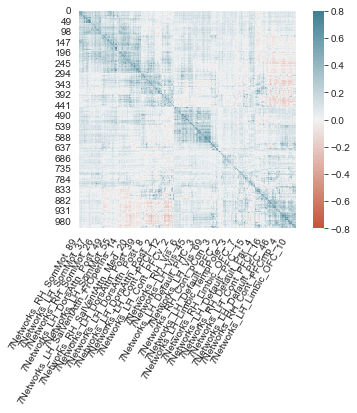

In [37]:
mat, labels = cmat_baseline_mean, region_names.tolist()
mat, labels = reorder(mat, labels)

labels = [l for i, l in enumerate(labels) if i%39==0]

ax = sns.heatmap(mat, square=True,
    vmin=-.8, vmax=.8, center=0,
    cmap=sns.diverging_palette(20, 220, n=200))
ax.set_xticklabels(labels, rotation=60,
    horizontalalignment='right')
plt.show()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

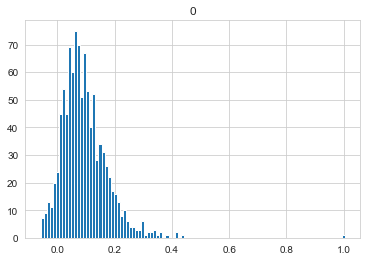

In [36]:
pd.DataFrame(cmat_baseline_mean[100]).hist(bins=100)

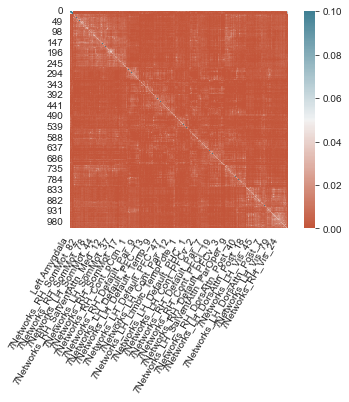

In [38]:
mat, labels = grand_mean, region_names.tolist()
mat, labels = reorder(mat, labels)

labels = [l for i, l in enumerate(labels) if i%39==0]

ax = sns.heatmap(mat, square=True,
    vmin=0, vmax=.1,
    cmap=sns.diverging_palette(20, 220, n=200))
ax.set_xticklabels(labels, rotation=60,
    horizontalalignment='right')
plt.show()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

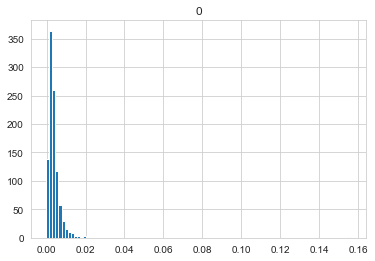

In [40]:
pd.DataFrame(grand_mean[100]).hist(bins=100)